In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline

In [2]:
df = pd.read_csv("kc_house_data.csv")

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#check the datatypes
df.dtypes


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
#drop any null values
df = df.dropna()

#check there's no null values
display(df.isna().any())

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

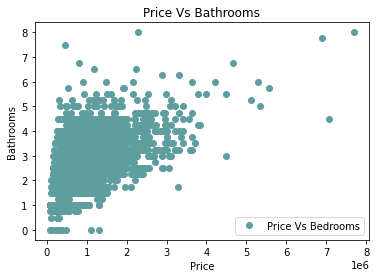

In [10]:
x = df['price']
y = df['bathrooms']

#remove the outlier bedroom (33) value
df = df[df.bedrooms != 33]
#create the scatterplot

plt.plot(x, y, 'o', color = 'cadetblue', label = 'Price Vs Bedrooms')

plt.title('Price Vs Bathrooms')
plt.xlabel('Price')
plt.ylabel('Bathrooms')
plt.legend()
plt.show()

In [6]:
#measure the correlation 

df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016788,0.002461,0.005144,-0.012276,-0.132118,0.018494,-0.002724,0.011582,-0.023701,0.008111,-0.010874,-0.005128,0.021352,-0.016915,-0.008208,-0.001859,0.020770,-0.002935,-0.138810
price,-0.016788,1.000000,0.315434,0.525144,0.702055,0.089658,0.256803,0.266332,0.397352,0.036366,0.667476,0.605589,0.323833,0.053993,0.126445,-0.053174,0.306914,0.021582,0.585399,0.082460
bedrooms,0.002461,0.315434,1.000000,0.529159,0.591467,0.032807,0.181085,-0.006611,0.081930,0.025478,0.366502,0.490600,0.309490,0.159167,0.019617,-0.157093,-0.010541,0.133882,0.402626,0.030402
bathrooms,0.005144,0.525144,0.529159,1.000000,0.754663,0.087735,0.500645,0.063742,0.187732,-0.124946,0.664979,0.685339,0.283789,0.506012,0.050735,-0.203858,0.024594,0.223028,0.568628,0.087170
sqft_living,-0.012276,0.702055,0.591467,0.754663,1.000000,0.172822,0.353937,0.103816,0.284606,-0.058704,0.762701,0.876597,0.435065,0.318037,0.055358,-0.199421,0.052552,0.240209,0.756419,0.183280
sqft_lot,-0.132118,0.089658,0.032807,0.087735,0.172822,1.000000,-0.005210,0.021603,0.074707,-0.008935,0.113616,0.183507,0.015293,0.053073,0.007641,-0.129571,-0.085675,0.229516,0.144602,0.718556
floors,0.018494,0.256803,0.181085,0.500645,0.353937,-0.005210,1.000000,0.023695,0.029432,-0.263706,0.458171,0.523866,-0.245684,0.489302,0.006330,-0.059102,0.049655,0.125388,0.279856,-0.011282
waterfront,-0.002724,0.266332,-0.006611,0.063742,0.103816,0.021603,0.023695,1.000000,0.401857,0.016665,0.082773,0.072072,0.080591,-0.026165,0.092884,0.030287,-0.014270,-0.041914,0.086461,0.030702
view,0.011582,0.397352,0.081930,0.187732,0.284606,0.074707,0.029432,0.401857,1.000000,0.046031,0.251315,0.167640,0.276959,-0.053452,0.103915,0.084834,0.006170,-0.078413,0.280432,0.072571
condition,-0.023701,0.036366,0.025478,-0.124946,-0.058704,-0.008935,-0.263706,0.016665,0.046031,1.000000,-0.144632,-0.158136,0.174057,-0.361380,-0.060602,0.002973,-0.015048,-0.106423,-0.092731,-0.003373


In [7]:
#start the model
#get slope and intercept value

from scipy import stats

X = df['price']
Y = df['bedrooms']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: 7.796179742565425e-07
The intercept is: 2.9483385448450177


In [8]:
import statsmodels.api as sm
model = sm.OLS(Y,X)
results = model.fit()
predictions = results.predict(X)

In [17]:
#describe the data with stats summary

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161200e+04,2.161200e+04,21612.000000,21612.000000,21612.000000,2.161200e+04,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000
mean,4.580402e+09,5.401775e+05,3.369471,2.114774,2079.921016,1.510739e+04,1.494332,0.007542,0.234314,3.409356,7.656904,1788.425319,291.495697,1971.006247,84.406163,98077.938645,47.560047,-122.213891,1986.582871,12768.828984
std,2.876594e+09,3.673701e+05,0.907982,0.770177,918.456818,4.142142e+04,0.539991,0.086519,0.766334,0.650668,1.175477,828.094487,442.580931,29.373636,401.688123,53.505993,0.138564,0.140829,685.392610,27304.756179
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.218375e+05,3.000000,1.750000,1426.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.250000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
#create a statistical summary

X = df['price']
Y = df['bathrooms']
X = sm.add_constant(X)
results1 = sm.OLS(Y, X).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              bathrooms   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     8229.
Date:                Thu, 04 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:19:36   Log-Likelihood:                -21535.
No. Observations:               21612   AIC:                         4.307e+04
Df Residuals:                   21610   BIC:                         4.309e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5201      0.008    191.727      0.000       1.505       1.536
price       1.101e-06   1.21e-08     90.713      0.000    1.08e-06    1.12e-06
==============================================================================
Omnibus:                      306.223   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              479.521
Skew:                           0.142   Prob(JB):                    7.47e-105
Kurtosis:                       3.672   Cond. No.                     1.16e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

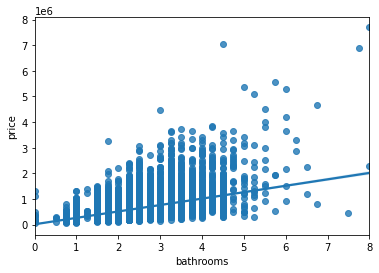

In [18]:
from scipy.stats import f_oneway

import seaborn as sns
#what is le6 and why is it there?

sns.regplot(x="bathrooms", y="price", data=df);

In [13]:
##trying to remove errors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#what is this value? Taken from lab with Pablo & I forgot
ln = LinearRegression()
ln.fit(X, Y)
print(ln.intercept_)

1.5200695094782892


In [14]:
ln.fit(X,Y)

LinearRegression()

In [16]:
predicitons = ln.predict(X)
predicitons

array([1.76436876, 2.11237685, 1.71823925, ..., 1.9627598 , 1.96044672,
       1.87787599])

[7.79617974e-07 2.94833854e+00]
[-1.77502804e-13  1.23361039e-06  2.77885071e+00]
[ 5.67888790e-20 -5.89987911e-13  1.81544698e-06  2.60788953e+00]
0        3.121336
1        3.367773
2        3.088670
3        3.419228
4        3.345944
           ...   
21607    3.229001
21608    3.260186
21609    3.261824
21610    3.260186
21611    3.201714
Name: price, Length: 21612, dtype: float64
0        3
1        3
2        2
3        4
4        3
        ..
21607    3
21608    4
21609    2
21610    3
21611    2
Name: bedrooms, Length: 21612, dtype: int64
0.09949861447725605
0.09949861447702857
0.0


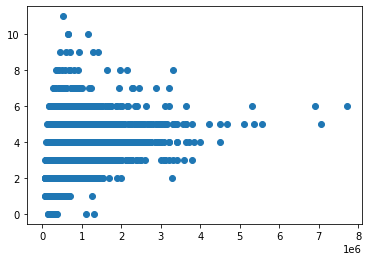

In [3]:

import numpy as np
x = df['price']
y = df['bedrooms']


p1 = np.polyfit(x,y,1)
p2 = np.polyfit(x,y,2)
p3 = np.polyfit(x,y,3)
print(p1)
print(p2)
print(p3)

import matplotlib.pyplot as plt
plt.plot(x,y,'o')
xp = np.linspace(-2,6,100)
plt.plot(xp,np.polyval(p1,xp),'r-')
plt.plot(xp,np.polyval(p2,xp),'b--')
plt.plot(xp,np.polyval(p3,xp),'m:')
yfit = p1[0] * x + p1[1]
yresid= y - yfit
SSresid = np.sum(yresid**2)
SStotal = len(y) * np.var(y)
rsq = 1 - SSresid/SStotal
print(yfit)
print(y)
print(rsq)

from scipy.stats import linregress
slope,intercept,r_value,p_value,std_err = linregress(x,y)
print(r_value**2)
print(p_value)
plt.show()

In [15]:

from scipy.interpolate import *
X = df['bathrooms']
Y = df['price']

p1 = np.polyfit(X, Y, 1)
print(p1)

[250490.57852009  10446.52748604]


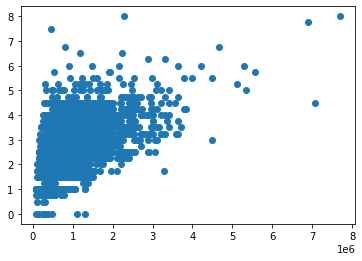

In [17]:
from matplotlib.pyplot import *
%matplotlib inline
plot(x,y,'o')


In [25]:
from numpy import *

plot(x, polyfit(p1, x), 'r=')

TypeError: _polyfit_dispatcher() missing 1 required positional argument: 'deg'

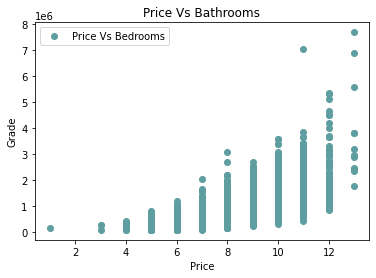

In [4]:
x = df['grade']
y = df['price']

#remove the outlier bedroom (33) value
df = df[df.bedrooms != 33]
#create the scatterplot

plt.plot(x, y, 'o', color = 'cadetblue', label = 'Price Vs Bedrooms')

plt.title('Price Vs Bathrooms')
plt.xlabel('Price')
plt.ylabel('Grade')
plt.legend()
plt.show()

In [ ]:
x = df['price']
y = df['price']

#remove the outlier bedroom (33) value
df = df[df.bedrooms != 33]
#create the scatterplot

plt.plot(x, y, 'o', color = 'cadetblue', label = 'Price Vs Bedrooms')

plt.title('Price Vs Bathrooms')
plt.xlabel('Price')
plt.ylabel('Bathrooms')
plt.legend()
plt.show()